# The Solar Panel Fault Detection Project

## Abstract:
There are two factors that can affect the performance of a solar panel. They are 
- Internal faults
- External disturbances

### Internal faults:
They occur due to the shorting of the modules that make up a panel. This causes a dip in the current and voltage readings leaading to less overall power output.

### External disturbances:
They are a result of naturally occuring external factors that lessen the intensity of sunlight(irradiance) that falls on the surface of the solar panels. This also causes dips in the current and voltage values again resulting in a dip in overall power output.

### The problem 
The change in readings due to internal faults can often be confused with that of external disturbances. It is the internal faults only that need attention. The external disturbances can be ignored as it may just be a passing cloud for example and should not be detected as a fault which requires attention.

## Objective:
To identify only the internal (Line-to-Line or LL) faults that can occur in a panel and be able to ignore the reduction in power output due to external (shading) disturbances.

In [1]:
# Importing the data

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("All_Solar_Data.csv")

data.describe()

,V_pv,I_pv,P_pv,G_pv,Gamma,no_of_module_fault,fault
count,452345.000000,452345.000000,452345.000000,452345.000000,452345.000000,452345.000000,452345.000000
mean,100.677057,7.766908,900.532860,717.601167,1.098132,0.442140,0.176856
std,39.268336,3.026479,531.197044,296.638665,0.424967,1.063455,0.381547
min,14.661448,1.151314,16.921073,100.000000,0.169211,0.000000,0.000000
25%,74.541379,5.780323,431.177978,500.000000,0.862356,0.000000,0.000000
50%,114.855706,8.877455,1020.316004,800.000000,1.074294,0.000000,0.000000
75%,132.948808,10.277742,1364.573039,1000.000000,1.516192,0.000000,0.000000
max,143.984023,11.530350,1588.883462,1000.000000,1.588883,4.000000,1.000000


In [22]:
data.head()

,V_pv,I_pv,P_pv,G_pv,Gamma,no_of_module_fault,fault
0,132.185340,11.530350,1524.143261,1000,1.524143,0,0
1,132.279976,11.527713,1524.885659,1000,1.524886,0,0
2,132.382781,11.524831,1525.689210,1000,1.525689,0,0
3,132.489714,11.521813,1526.521771,1000,1.526522,0,0
4,132.592768,11.518886,1527.320956,1000,1.527321,0,0


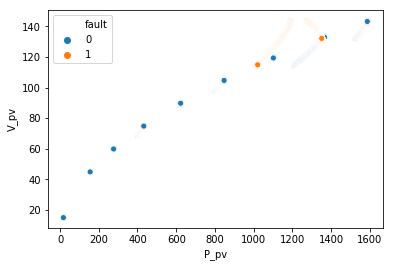

In [23]:
sns.scatterplot(x=data["P_pv"], y=data["V_pv"], hue=data["fault"])

/home/sprince0031/.local/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


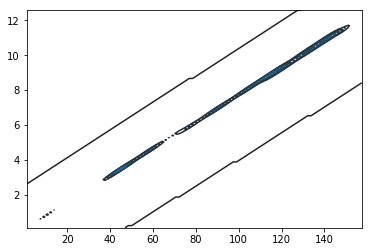

In [45]:
sns.kdeplot(data)

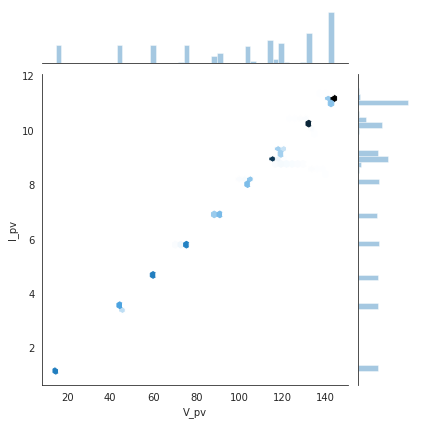

In [46]:
with sns.axes_style('white'):
    sns.jointplot("V_pv", "I_pv", data, kind='hex')


In [58]:
shuffledDf = data.sample(frac=1)
shuffledDf.columns = shuffledDf.columns.str.strip()
# For performing multi-label classification
# from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import KFold
X = shuffledDf[["V_pv", "I_pv", "P_pv", "G_pv", "Gamma"]]
y_temp = shuffledDf.drop(["V_pv", "I_pv", "P_pv", "G_pv", "Gamma"], axis=1)
# y = mlb.fit_transform(y_temp)
kf = KFold(n_splits=10)
shuffledDf.head()
X.shape
y_temp.shape


(452345, 2)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y_temp, test_size=0.2)

In [61]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)
predict_GNB = model_GNB.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, predict_GNB))
# scores = cross_val_score(model, X, y, cv=10)
# print("Cross-validated scores:", scores)


ValueError: bad input shape (361876, 2)

In [26]:
# Extra tests
testData = pd.read_csv('Solar_test.csv')
Shuffled_tD = testData.sample(frac=1)
sTD_X = Shuffled_tD.drop(['no_of_module_fault','fault'], axis=1)
sTD_y = Shuffled_tD[['no_of_module_fault', 'fault']]


In [27]:
predict_TD_GNB = model_GNB.predict(sTD_X)
print("Accuracy:", accuracy_score(sTD_y, predict_TD_GNB))

ValueError: operands could not be broadcast together with shapes (127955,5) (4,) 

In [22]:
# Extra cross validation tests

scores = cross_val_score(model_GNB, X, y, cv=10, scoring='f1_macro')
print("Cross-validated scores:", scores)

ValueError: Found input variables with inconsistent numbers of samples: [452345, 2]

In [99]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

logRegScores = cross_val_predict(logReg, X, y, cv=10)
print("Cross-validated scores:", scores)

/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Cross-validated scores: [0.92335581 0.92384216 0.92384216 0.9233337  0.92324527 0.92494584
 0.92156343 0.92242561 0.92264668 0.92253615]


In [100]:
from sklearn.svm import LinearSVC
model_SVM = LinearSVC()
model_SVM.fit(X_train, y_train)
predict_SVM = model_SVM.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predict_SVM))

Accuracy: 0.9593783505952315


/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Working with data having realtime Irradiance(G) values

In [32]:
newData = pd.read_csv("solar_final_data.csv")
newData.describe()

,V_pv,I_pv,P_pv,G,gamma,no_of_faults,faults
count,990025.000000,990025.000000,990025.000000,990025.000000,990025.000000,990025.000000,990025.000000
mean,79.473771,6.106451,524.327142,557.244633,0.876692,1.616068,0.646426
std,22.223291,1.989051,284.540200,168.681197,0.283590,1.495506,0.478079
min,24.981594,1.449344,43.831942,153.451000,0.242328,0.000000,0.000000
25%,63.039159,4.604488,287.996021,418.655950,0.667036,0.000000,0.000000
50%,79.353603,6.121138,480.879987,569.909668,0.863062,1.000000,1.000000
75%,95.899238,7.572275,726.020716,693.423915,1.111996,3.000000,1.000000
max,123.632180,10.931643,1284.743415,910.815000,1.529415,4.000000,1.000000


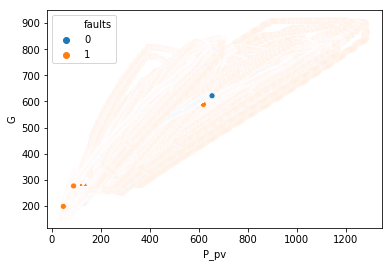

In [6]:
sns.scatterplot(x=newData['P_pv'], y=newData['G'], hue=newData['faults'])

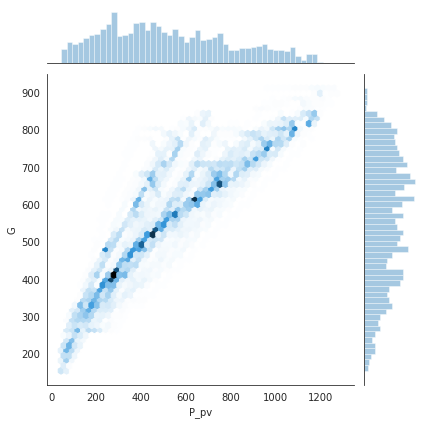

In [12]:
with sns.axes_style('white'):
    sns.jointplot("P_pv", "G", newData, kind='hex')


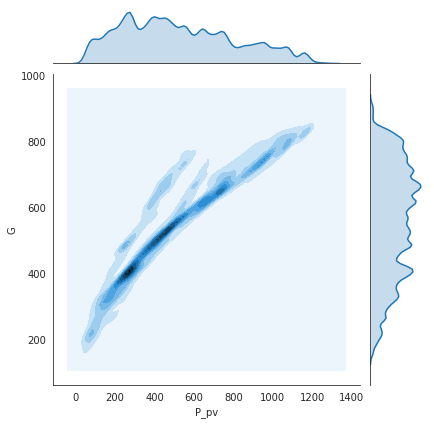

In [13]:
with sns.axes_style('white'):
    sns.jointplot("P_pv", "G", newData, kind='kde');

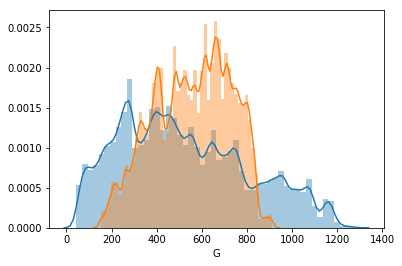

In [15]:
sns.distplot(newData['P_pv'])
sns.distplot(newData['G']);

In [33]:
newDataShuffled = newData.sample(frac=1)
newModel_GNB = GaussianNB()

In [35]:
from sklearn.model_selection import KFold, StratifiedKFold
KF = KFold(10, True)
SSS = StratifiedKFold(n_splits=10)
newX = newDataShuffled[["V_pv", "I_pv", "P_pv", "G", "gamma"]]
newy = newDataShuffled["faults"]

# for train, test in KF.split(newData):
#     print("train: %s, test: %s" % (newX[train], newY[test]))

new_GNB_Score = cross_val_score(newModel_GNB, newX, newy, cv=SSS.split(newX, newy))

In [36]:
print(new_GNB_Score)

[0.65916184 0.65524277 0.65906084 0.65633365 0.65680838 0.65482864
 0.65684878 0.65448173 0.65636711 0.65898324]


In [37]:
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, newy, test_size=20)

In [39]:
newModel_GNB.fit(newX_train, newy_train)
newPredictied_GNB = newModel_GNB.predict(newX_test)

In [40]:
print("Accuracy:", accuracy_score(newy_test, newPredictied_GNB))

Accuracy: 0.65


In [41]:
newTestData = pd.read_csv("solar_final_data_3.csv")
newTestDataShuffled = newTestData.sample(frac=1)

newTestX = newTestDataShuffled.drop(['no_of_faults', 'faults'], axis=1)
newTesty = newTestDataShuffled['faults']

newTestPrediction =  newModel_GNB.predict(newTestX)
print(newTestPrediction[:10])
print(newTesty[:10])

[1 1 1 0 0 0 1 0 1 1]
324778    0
280933    1
165345    1
279564    1
210879    0
187374    1
36240     0
366813    1
386098    1
424394    1
Name: faults, dtype: int64


In [42]:
print("Accuracy:", accuracy_score(newTesty, newTestPrediction))

Accuracy: 0.5907444481031735


In [43]:
newTestprediction_CV = cross_val_predict(newModel_GNB, newTestX, newTesty, cv=10)

In [45]:
print(newTestprediction_CV[:10])
print(newTesty[:10])

[0 1 0 1 0 1 0 1 1 0]
324778    0
280933    1
165345    1
279564    1
210879    0
187374    1
36240     0
366813    1
386098    1
424394    1
Name: faults, dtype: int64


In [64]:
from sklearn.linear_model import LogisticRegression
newModel_logReg = LogisticRegression()

newLogRegScores = cross_val_score(newModel_logReg, newTestX, newTesty, cv=10)
print("Cross-validated scores:", newLogRegScores)

/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Cross-validated scores: [0.84598602 0.8472587  0.84608703 0.84784453 0.84651125 0.84705359
 0.84521212 0.84826263 0.84355556 0.84876768]


In [65]:
from sklearn.tree import DecisionTreeClassifier
newModel_DT = DecisionTreeClassifier()

newPrediction_DT = cross_val_score(newModel_DT, newX, newy, cv=SSS.split(newX, newy))

In [66]:
print("Cross-validated scores:",newPrediction_DT)

Cross-validated scores: [0.87840773 0.87735725 0.87885216 0.87693302 0.87764007 0.8780138
 0.87748856 0.87781055 0.8765366  0.87777901]
